In [13]:
import filterM
import cv2
import time
from matplotlib import pyplot as plt
import math
import numpy as np
from PIL import Image
from PIL import ImageChops
import scipy.misc
import time
np.seterr(over='ignore')
plt.rcParams['figure.figsize'] = (5, 5)

#### Оригинальное изображение

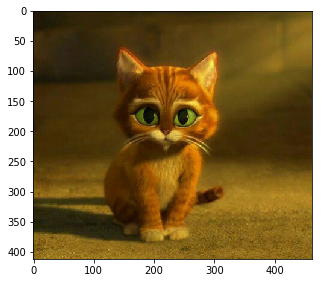

In [11]:
original =cv2.imread("kotOriginal2.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(original)
plt.show()

#### Зашумленное изображение

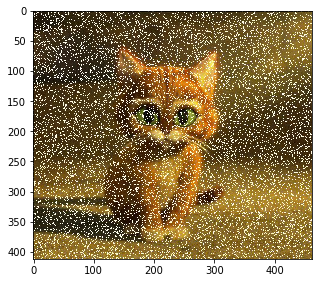

In [14]:
noisy = cv2.imread("kotsh3.jpg")
noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)
plt.imshow(noisy)
plt.show()

#### Отфильтрованное встроенным фильтром

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


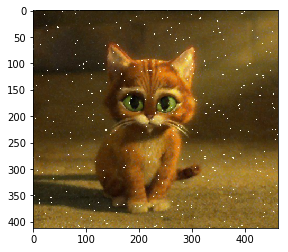

In [4]:
median_filter = cv2.medianBlur(noisy, 3)
scipy.misc.imsave('cvfilter.jpg', median_filter)
plt.imshow(median_filter)
plt.show()

#### отфильтрованное VMF с метрикой L1

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


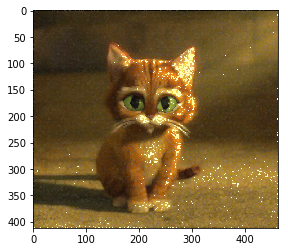

In [5]:
r = 1
k = 1
vmf1 = filterM.Filter(r, noisy, k).vmf()

scipy.misc.imsave("vmf1.jpg", vmf1)
plt.imshow(vmf1)
plt.show()

#### отфильтрованное VMF с метрикой L2

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


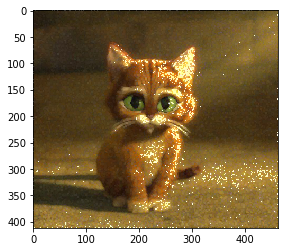

In [6]:
r = 1
k = 2
vmf2 = filterM.Filter(r, noisy, k).vmf()
scipy.misc.imsave("vmf2.jpg", vmf2)
plt.imshow(vmf2)
plt.show()

#### Отфильтрованное VMF с метрикой L∞

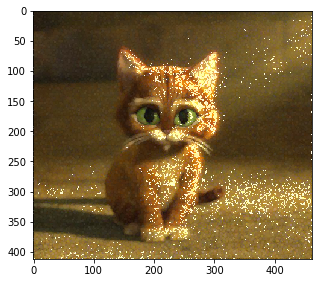

In [9]:
r = 1
k = 8
vmf8 = filterM.Filter(r, noisy, k).vmf()
scipy.misc.imsave("vmf8.jpg", vmf8)
plt.imshow(vmf8)
plt.show()

#### Среднеквадратичное отклонение по каналам оригинала и зашумленного

In [15]:
m = original.shape[0]
n = original.shape[1]
numP = math.sqrt(n * m)
qr = math.sqrt(np.sum((original[:, :, 0] - noisy[:, :, 0]) ** 2)) / numP
qg = math.sqrt(np.sum((original[:, :, 1] - noisy[:, :, 1]) ** 2)) / numP
qb = math.sqrt(np.sum((original[:, :, 2] - noisy[:, :, 2]) ** 2)) / numP
print("r: " + str(qr))
print("g: " + str(qg))
print("b: " + str(qb))

r: 6.960718199493089
g: 6.491083992848202
b: 9.031201956423383


#### Среднеквадратичное отклонение по каналам оригинал и встроенный фильтр

In [9]:
qr = math.sqrt(np.sum((original[:,:,0] - median_filter[:,:,0])**2))/numP
qg = math.sqrt(np.sum((original[:,:,1] - median_filter[:,:,1])**2))/numP
qb = math.sqrt(np.sum((original[:,:,2] - median_filter[:,:,2])**2))/numP
print("r: "+str(qr))
print("g: "+str(qg))
print("b: "+str(qb))

r: 4.660622625638457
g: 4.479558699316199
b: 9.240762352699372


#### Cреднеквадратичное отклонение по каналам оригинал и VMF с метрикой L1

In [10]:
qr = math.sqrt(np.sum((original[:,:,0]-vmf1[:,:,0])**2))/numP
qg = math.sqrt(np.sum((original[:,:,1]-vmf1[:,:,1])**2))/numP
qb = math.sqrt(np.sum((original[:,:,2]-vmf1[:,:,2])**2))/numP
print("r: "+str(qr))
print("g: "+str(qg))
print("b: "+str(qb))

r: 7.756082315954483
g: 8.417612710068738
b: 10.558136168017818


#### Cреднеквадратичное отклонение по каналам оригинал и VMF с метрикой L2

In [11]:
qr = math.sqrt(np.sum((original[:,:,0]-vmf2[:,:,0])**2))/numP
qg = math.sqrt(np.sum((original[:,:,1]-vmf2[:,:,1])**2))/numP
qb = math.sqrt(np.sum((original[:,:,2]-vmf2[:,:,2])**2))/numP
print("r: "+str(qr))
print("g: "+str(qg))
print("b: "+str(qb))

r: 7.762529029071259
g: 8.367498411796246
b: 10.596187727833065


#### Cреднеквадратичное отклонение по каналам оригинал и VMF с метрикой L∞

In [16]:
qr = math.sqrt(np.sum((original[:,:,0]-vmf8[:,:,0])**2))/numP
qg = math.sqrt(np.sum((original[:,:,1]-vmf8[:,:,1])**2))/numP
qb = math.sqrt(np.sum((original[:,:,2]-vmf8[:,:,2])**2))/numP
print("r: "+str(qr))
print("g: "+str(qg))
print("b: "+str(qb))

r: 7.750651962384717
g: 8.286773866082804
b: 10.60625573806856


In [17]:
im_original = Image.open("kotOriginal2.jpg")
im_vmf1 = Image.open("vmf1.jpg")
im_vmf2 = Image.open("vmf2.jpg")
im_vmf8 = Image.open("vmf8.jpg")
im_cvf = Image.open("cvfilter.jpg")

#### Цветовая разница оригинала и VMF с L1

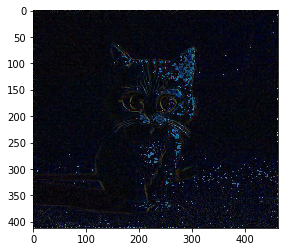

In [14]:
diff_vmf1 = ImageChops.difference(im_original,im_vmf1)
plt.imshow(diff_vmf1)
plt.show()

#### Цветовая разница оригинала и VMF с L2

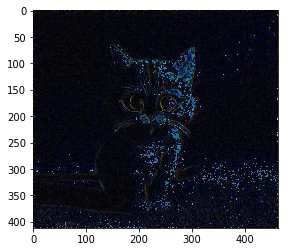

In [15]:
diff_vmf2 = ImageChops.difference(im_original,im_vmf2)
plt.imshow(diff_vmf2)
plt.show()

#### Цветовая разница оригинала и VMF с L∞

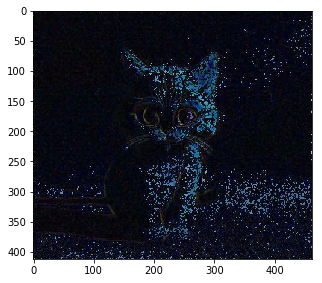

In [18]:
diff_vmf8 = ImageChops.difference(im_original,im_vmf8)
plt.imshow(diff_vmf8)
plt.show()

#### Цветовая разница оригинала и встроенного фильтра

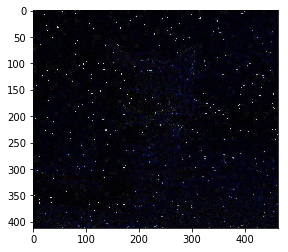

In [16]:
diff_cvf = ImageChops.difference(im_original,im_cvf)
plt.imshow(diff_cvf)
plt.show()